In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [23]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

In [24]:
data = pd.merge(transactions, customers, on='CustomerID')

In [25]:
customer_summary = data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'TransactionID': 'count',
    'TransactionDate': 'max'
}).reset_index()


In [26]:
customer_summary['Recency'] = (pd.to_datetime('today') - pd.to_datetime(customer_summary['TransactionDate'])).dt.days

In [27]:
customer_summary.rename(columns={'TotalValue': 'TotalSpend', 'TransactionID': 'Frequency'}, inplace=True)

In [28]:
X = customer_summary[['TotalSpend', 'Frequency', 'Recency']]

In [34]:
X.head()

,TotalSpend,Frequency,Recency
0,3354.52,5,87
1,1862.74,4,57
2,2725.38,4,157
3,5354.88,8,37
4,2034.24,3,86


In [29]:
inertia = []
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

C:\Users\sspon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sspon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sspon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sspon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

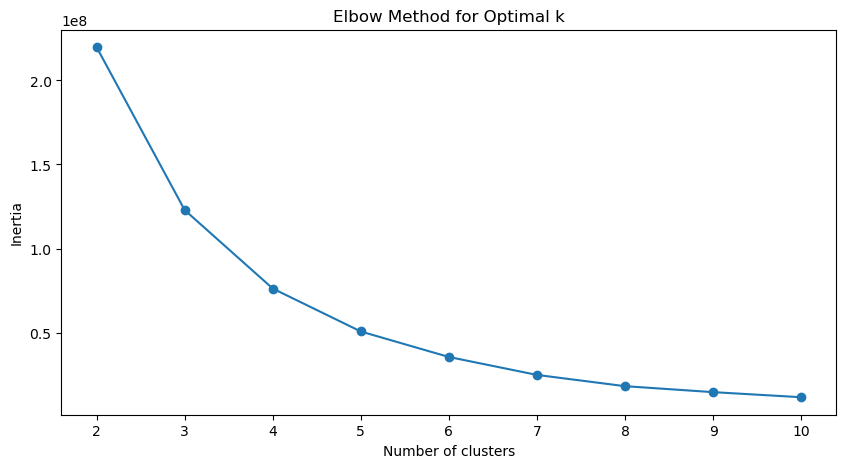

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [31]:
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_summary['Cluster'] = kmeans.fit_predict(X)

C:\Users\sspon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sspon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [32]:
db_index = davies_bouldin_score(X, customer_summary['Cluster'])

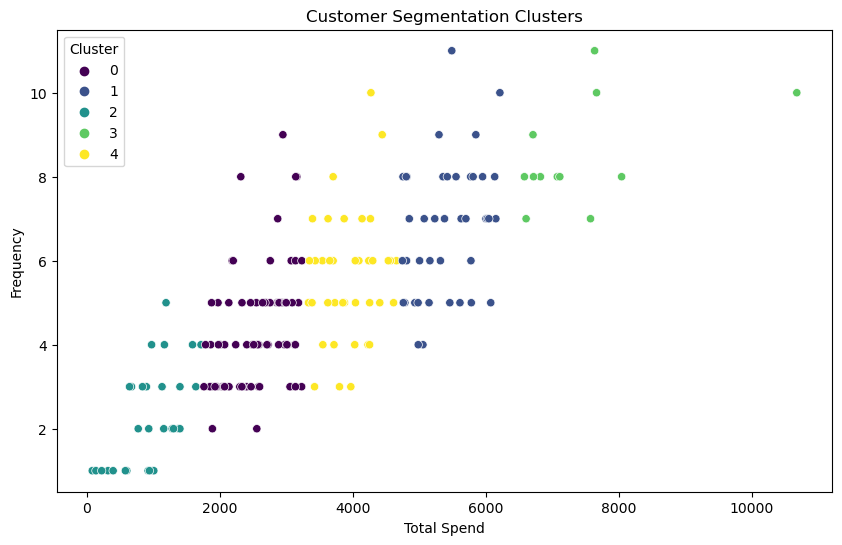

DB Index: 0.5344060137673075
Silhouette Score: 0.52787766625618


In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_summary, x='TotalSpend', y='Frequency', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation Clusters')
plt.xlabel('Total Spend')
plt.ylabel('Frequency')
plt.legend(title='Cluster')
plt.show()
print(f'DB Index: {db_index}')
print(f'Silhouette Score: {silhouette_score(X, customer_summary["Cluster"])}')